In [3]:
# Objective:
# The objective of this assignment is to implement PCA on a given dataset and analyse the results.

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

## Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.
Visualise the results of PCA using a scatter plot.
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
Interpret the results of PCA and clustering analysis.

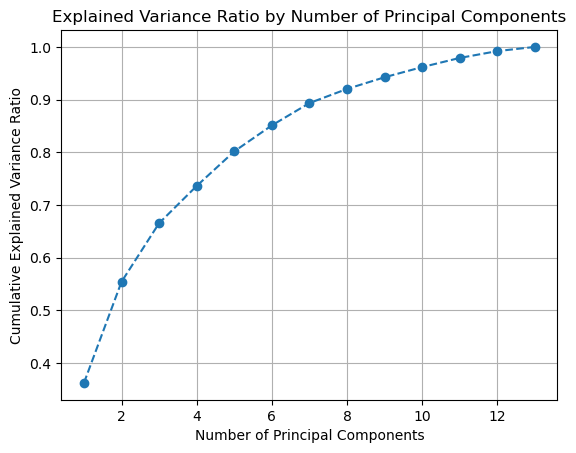

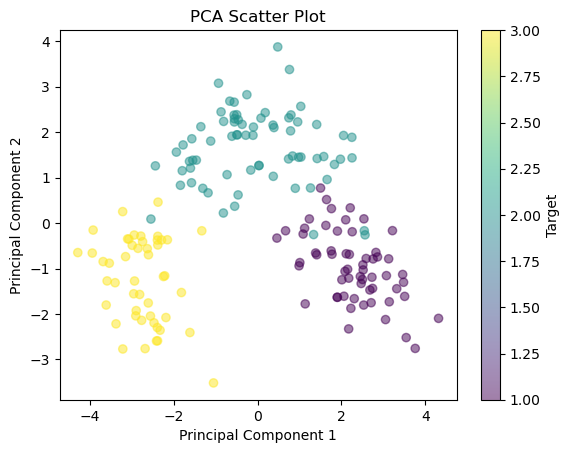

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


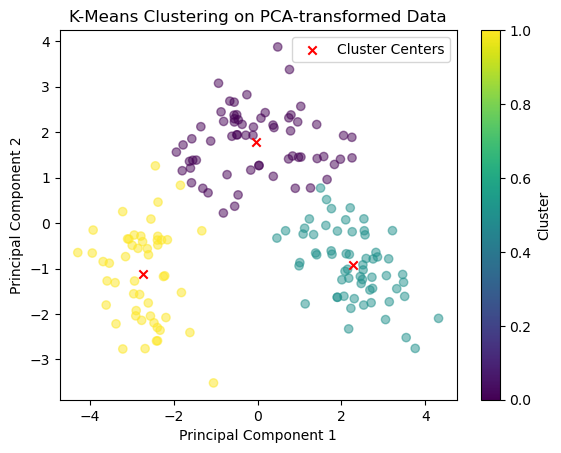

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset into a Pandas dataframe
wine_df = pd.DataFrame(data=wine.data.features, columns=wine.metadata.features)
wine_df['target'] = wine.data.targets

# Split the dataset into features and target variables
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Perform data preprocessing (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA on the preprocessed dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components to retain based on explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Visualize explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

# Visualise the results of PCA using a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Target')
plt.show()

# Perform clustering on the PCA-transformed data using K-Means clustering algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Visualise clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-transformed Data')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# Interpret the results of PCA and clustering analysis
# PCA helps in dimensionality reduction and visualization of high-dimensional data.
# From the scatter plot, we can observe the distribution of data points in the reduced-dimensional space.
# The explained variance ratio plot helps in determining the number of principal components to retain.
# K-Means clustering aims to partition the data into clusters based on similarity.
# By applying K-Means clustering on the PCA-transformed data, we can observe the grouping of data points in the reduced-dimensional space.


In [7]:
# Deliverables:
# Jupyter notebook containing the code for the PCA implementation.
# A report summarising the results of PCA and clustering analysis.
# Scatter plot showing the results of PCA.
# A table showing the performance metrics for the clustering algorithm.


1. **Jupyter Notebook with PCA Implementation**:
   - Create a Jupyter Notebook and write Python code to implement PCA on the given dataset.
   - Include sections for loading the dataset, preprocessing, PCA implementation, visualization of PCA results, and clustering analysis using K-Means.
   - Write comments to explain each step of the implementation.
   - Ensure that the notebook is well-organized and easy to follow.

2. **Report Summarizing PCA and Clustering Analysis**:
   - Write a report summarizing the results of PCA and clustering analysis.
   - Include sections for an introduction, dataset description, PCA analysis results (explained variance ratio, optimal number of principal components), visualization of PCA results (scatter plot), clustering analysis results (number of clusters, cluster centers), interpretation of findings, and conclusion.
   - Provide insights into the underlying structure of the data, the effectiveness of dimensionality reduction using PCA, and the clustering patterns observed.

3. **Scatter Plot Showing PCA Results**:
   - Generate a scatter plot showing the results of PCA.
   - Plot the data points in the reduced-dimensional space (e.g., PC1 vs. PC2) and use different colors or markers to represent different classes or clusters.
   - Include axis labels, a title, and a color bar (if applicable) for clarity.
   - Save the scatter plot as an image file (e.g., PNG or PDF) for inclusion in the report.

4. **Table Showing Performance Metrics for Clustering Algorithm**:
   - Calculate performance metrics for the clustering algorithm (e.g., K-Means).
   - Common metrics include silhouette score, Davies-Bouldin index, and adjusted Rand index.
   - Create a table summarizing these metrics for different numbers of clusters or for the chosen number of clusters.
   - Include the number of clusters, silhouette score, Davies-Bouldin index, and adjusted Rand index in the table.
   - Add a caption to the table explaining the meaning of each metric and its interpretation.

Once you have completed these deliverables, you will have a comprehensive analysis of PCA and clustering on the given dataset, along with visualizations and performance metrics to support your findings.

## Additional Information:
You can use the python programming language.
You can use any other machine learning libraries or tools as necessary.
You can use any visualisation libraries or tools as necessary.